# Loading necessary libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data and understanding it through describe method

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Finding number of rows and number of columns
data.shape

(1460, 81)

In [5]:
# Finding the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

In [7]:
data.describe() #checking for numeric values

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Removing Outliers

In [8]:
data['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b5678a110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b5673ecd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b5676f550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b56742a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b5673e250>,
  <matplotlib.lines.Line2D at 0x7f5b5673e790>]}

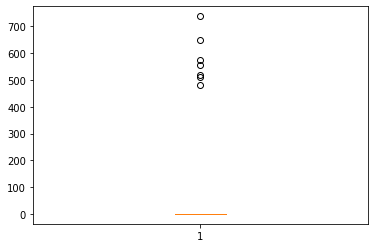

In [9]:
plt.boxplot(data['PoolArea'])

In [10]:
# As indicated from box plot there are lot of ouliers on higher side which may affect the accuracy of the model
Q1 = data['PoolArea'].quantile(0.1)
Q3 = data['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['PoolArea'] <= Q3 + 1.5*IQR)]
data.shape

(1453, 81)

In [11]:
data['MiscVal'].describe()

count     1453.000000
mean        42.322092
std        494.650558
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b566cd150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b566d2350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b566d8490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b566d2c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b566cd750>,
  <matplotlib.lines.Line2D at 0x7f5b566cde50>]}

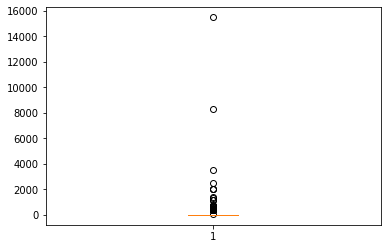

In [12]:
plt.boxplot(data['MiscVal'])

In [13]:
Q1 = data['MiscVal'].quantile(0.1)
Q3 = data['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
data = data[data['MiscVal'] <= Q3 + 1.5*IQR]
data.shape

(1402, 81)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b561f8810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b561fb8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b56202910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b562023d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b561f8e10>,
  <matplotlib.lines.Line2D at 0x7f5b561fb390>]}

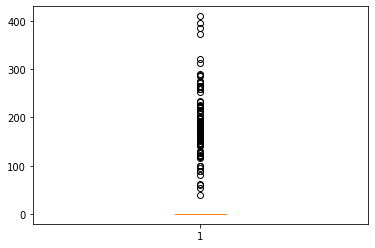

In [14]:
plt.boxplot(data['ScreenPorch'])

In [15]:
Q1 = data['ScreenPorch'].quantile(0.1)
Q3 = data['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['ScreenPorch'] <= Q3 + 1.5*IQR)]
data.shape

(1291, 81)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b566f8c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b566b6590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b56fc5810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b56fc5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b56704f10>,
  <matplotlib.lines.Line2D at 0x7f5b5678a150>]}

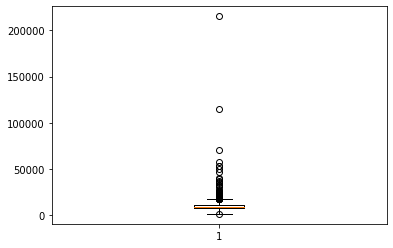

In [16]:
plt.boxplot(data['LotArea'])

In [17]:
data['LotArea'].quantile(0.0001)

1322.833

In [18]:
Q1 = data['LotArea'].quantile(0.1)
Q3 = data['LotArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['LotArea'] >= Q1 - 1.5*IQR) & (data['LotArea'] <= Q3 + 1.5*IQR)]
data.shape

(1274, 81)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b56136f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b56145050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b5614d090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b56145b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b5613d590>,
  <matplotlib.lines.Line2D at 0x7f5b5613dad0>]}

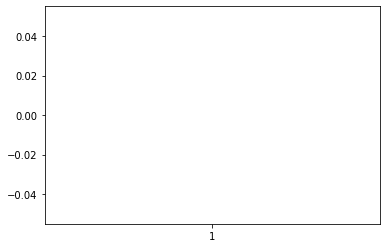

In [19]:
plt.boxplot(data['MasVnrArea'])

In [20]:
data['MasVnrArea'].describe()

count    1267.000000
mean      100.621942
std       172.314827
min         0.000000
25%         0.000000
50%         0.000000
75%       162.500000
max      1170.000000
Name: MasVnrArea, dtype: float64

In [21]:
Q1 = data['MasVnrArea'].quantile(0.1)
Q3 = data['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['MasVnrArea'] <= Q3 + 1.5*IQR)]
data.shape

(1255, 81)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b560a94d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b560af590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b560b35d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b560b3090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b560a9ad0>,
  <matplotlib.lines.Line2D at 0x7f5b560af050>]}

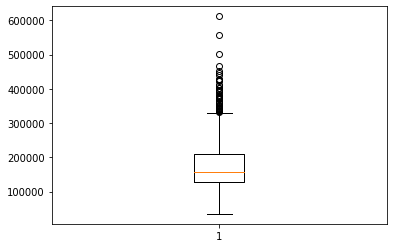

In [22]:
plt.boxplot(data['SalePrice'])

In [23]:

Q1 = data['SalePrice'].quantile(0.1)
Q3 = data['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['SalePrice'] <= Q3 + 1.5*IQR)]
data.shape

(1253, 81)

# Treating Missing Values

In [24]:
# Finding number of columns having null values
(data.isnull().sum()>0).sum()

17

In [25]:
#Checking how many rows have all the data missing
data.isnull().all(axis=1).sum()

0

In [26]:
#finding columns with null values
null_columns=data.columns[(data.isnull().sum())>0]
print(null_columns)

Index(['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [27]:
# Finding number of missing values in 
data[null_columns].isnull().sum()

LotFrontage      213
Alley           1171
BsmtQual          34
BsmtCond          34
BsmtExposure      35
BsmtFinType1      34
BsmtFinType2      35
Electrical         1
FireplaceQu      632
GarageType        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1253
Fence           1021
MiscFeature     1251
dtype: int64

In [28]:
data[null_columns].describe(include='all')

,LotFrontage,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1040.000000,82,1219,1219,1218,1219,1218,1252,621,1175,1175.000000,1175,1175,1175,0,232,2
unique,NaN,2,4,4,4,6,6,5,5,6,NaN,3,5,5,0,4,2
top,NaN,Grvl,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,NaN,Unf,TA,TA,NaN,MnPrv,Shed
freq,NaN,46,552,1121,830,387,1086,1139,308,736,NaN,524,1118,1128,NaN,132,1
mean,68.861538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979.115745,NaN,NaN,NaN,NaN,NaN,NaN
std,22.988637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.875949,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median()) # Imputing null values by median
data['Alley']= data['Alley'].fillna('NA') # Imputing null values by no alley access
data['BsmtCond']= data['BsmtCond'].fillna('NA') # Imputing null values by no basement
data['BsmtQual']= data['BsmtQual'].fillna('NA') # Imputing null values by no basement
data['BsmtExposure']= data['BsmtExposure'].fillna('NA') # Imputing null values by no basement
data['BsmtFinType1']= data['BsmtFinType1'].fillna('NA') # Imputing null values by no basement
data['BsmtFinType2']= data['BsmtFinType2'].fillna('NA') # Imputing null values by no basement
data['Electrical']= data['Electrical'].fillna(data['Electrical'].mode()[0]) # Imputing null values by mode
data['FireplaceQu']= data['FireplaceQu'].fillna('NA') # Imputing null values by no fire place
data['GarageType']= data['GarageType'].fillna('NA') # Imputing null values by no garrage
data['GarageFinish']= data['GarageFinish'].fillna('NA') # Imputing null values by no garrage
data['GarageQual']= data['GarageQual'].fillna('NA') # Imputing null values by no garrage
data['GarageCond']= data['GarageCond'].fillna('NA') # Imputing null values by no garrage
data['PoolQC']= data['PoolQC'].fillna('NA') # Imputing null values by no pool
data['Fence']= data['Fence'].fillna('NA') # Imputing null values by no fence
data['MiscFeature']= data['MiscFeature'].fillna('NA') # Imputing null values by none
data[['BsmtQual','Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature']].describe(include='all')

,BsmtQual,Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
unique,5,3,5,5,7,7,5,6,7,4,6,6,1,5,3
top,TA,NA,TA,No,Unf,Unf,SBrkr,NA,Attchd,Unf,TA,TA,NA,NA,NA
freq,552,1171,1121,830,387,1086,1140,632,736,524,1118,1128,1253,1021,1251


In [30]:
# Again finding out null values
data[null_columns].isnull().sum()

LotFrontage      0
Alley            0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Electrical       0
FireplaceQu      0
GarageType       0
GarageYrBlt     78
GarageFinish     0
GarageQual       0
GarageCond       0
PoolQC           0
Fence            0
MiscFeature      0
dtype: int64

In [ ]:
data['GarageYrBlt'].astype('object').describe(include='all')

count     1175.0
unique      95.0
top       2005.0
freq        62.0
Name: GarageYrBlt, dtype: float64

In [31]:
# Cannot immpute with median as it has no garrage as per data dictionary
# removing GarageYrBlt column as it has 95 unique values 
# Will create 94 columns if dummy variables are created so better to drop
data.drop('GarageYrBlt',axis=1, inplace=True)

In [33]:
#removing duplicate rows
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [34]:
data.shape # no duplicate rows present

(1253, 80)

# Deriving new metrics

In [35]:
#converting year to number of years
data['YearBuilt'] = 2021 - data['YearBuilt']
data['YearRemodAdd'] = 2021 - data['YearRemodAdd']
data['YrSold'] = 2021 - data['YrSold']

In [36]:
data[['YearBuilt','YearRemodAdd','YrSold']].describe(include='all')

,YearBuilt,YearRemodAdd,YrSold
count,1253.000000,1253.000000,1253.000000
mean,49.225858,35.832402,13.204310
std,30.661361,20.803139,1.324896
min,11.000000,11.000000,11.000000
25%,20.000000,17.000000,12.000000
50%,46.000000,27.000000,13.000000
75%,68.000000,54.000000,14.000000
max,149.000000,71.000000,15.000000


# Converting numerical variables into categorical variables as per data dictioanry

In [38]:
data[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']].describe(include='all')

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,57.553871,6.059058,5.551476,0.409417,0.052674,1.564246,0.370311,2.858739,1.049481,6.474062,0.555467,1.746209
std,42.884025,1.359392,1.104713,0.511035,0.230508,0.537773,0.497739,0.808302,0.227734,1.596323,0.608378,0.757969
min,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000
50%,50.000000,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000
75%,70.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000
max,190.000000,10.000000,9.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000


In [39]:
# converting variables into caegorical variables
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

In [40]:
data[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']].describe(include='all')

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
unique,15,10,9,4,3,4,3,8,4,12,4,5
top,20,5,5,0,0,2,0,3,1,6,0,2
freq,456,352,727,751,1189,674,798,694,1191,352,632,699


#  Bivariate Analysis and generating dummy varibales from categorical variables

In [41]:
# selecting only categorical variables
data_category = data.select_dtypes(include=['object'])
data_category.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,NA,NA,NA,WD,Normal


In [42]:
data_category.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
unique,15,5,2,3,4,4,1,5,3,25,9,6,5,8,10,9,6,6,15,15,4,4,4,6,5,5,5,7,7,6,5,2,5,4,3,4,3,8,4,4,12,7,4,6,7,4,5,6,6,3,1,5,3,9,6
top,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,Unf,2,TA,TA,Y,NA,NA,NA,WD,Normal
freq,456,969,1251,1171,818,1136,1253,909,1201,184,1079,1242,1036,624,352,727,1006,1240,473,464,751,773,1104,574,552,1121,830,387,1086,1226,646,1166,1140,751,1189,674,798,694,1191,626,352,1176,632,632,736,524,699,1118,1128,1146,1253,1021,1251,1087,1028


In [43]:
# creating dummies out of categorical variables
dummy = pd.get_dummies(data_category, drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [44]:
# Dropping all categorical variables
data=data.drop(list(data_category.columns), axis=1)
data.shape

(1253, 25)

In [45]:
data.corr()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.025049,0.010375,0.006160,0.006790,-0.043859,-0.001461,-0.010367,-0.016618,-0.023732,0.009353,-0.000864,-0.022669,0.004020,0.011513,-0.023954,-0.027500,0.007206,-0.039298,NaN,NaN,NaN,0.035188,-0.004579,-0.020819
LotFrontage,-0.025049,1.000000,0.567346,-0.124932,-0.092016,0.151410,0.109486,0.033694,0.139178,0.279133,0.353612,0.045600,0.018676,0.306788,0.297546,0.084044,0.100811,-0.008003,0.072497,NaN,NaN,NaN,0.048745,-0.019200,0.346255
LotArea,0.010375,0.567346,1.000000,-0.069664,-0.049754,0.122030,0.164128,0.065012,0.096268,0.299978,0.405766,0.097785,-0.001358,0.389811,0.315516,0.152688,0.124028,-0.002329,0.086990,NaN,NaN,NaN,0.027569,0.018127,0.395485
YearBuilt,0.006160,-0.124932,-0.069664,1.000000,0.603156,-0.320194,-0.241076,0.056374,-0.160980,-0.405095,-0.284067,0.000327,0.170711,-0.195700,-0.491273,-0.236582,-0.192531,0.415674,-0.026797,NaN,NaN,NaN,-0.017720,-0.014939,-0.570185
YearRemodAdd,0.006790,-0.092016,-0.049754,0.603156,1.000000,-0.181932,-0.114550,0.073007,-0.186041,-0.295909,-0.235143,-0.125421,0.067723,-0.279844,-0.384061,-0.220826,-0.251865,0.209324,-0.044748,NaN,NaN,NaN,-0.030108,0.035555,-0.544688
MasVnrArea,-0.043859,0.151410,0.122030,-0.320194,-0.181932,1.000000,0.220225,-0.060600,0.121771,0.338750,0.325227,0.121509,-0.073127,0.343334,0.368799,0.192150,0.126183,-0.112271,0.041606,NaN,NaN,NaN,0.032866,-0.012092,0.460757
BsmtFinSF1,-0.001461,0.109486,0.164128,-0.241076,-0.114550,0.220225,1.000000,-0.058516,-0.526551,0.429270,0.354617,-0.191116,-0.066045,0.090882,0.248148,0.205594,0.075358,-0.123781,0.035019,NaN,NaN,NaN,0.008269,-0.037464,0.383672
BsmtFinSF2,-0.010367,0.033694,0.065012,0.056374,0.073007,-0.060600,-0.058516,1.000000,-0.215292,0.078283,0.069904,-0.086538,0.021598,-0.021696,-0.021745,0.079021,-0.020034,0.050871,-0.029953,NaN,NaN,NaN,-0.012057,-0.025610,-0.037043
BsmtUnfSF,-0.016618,0.139178,0.096268,-0.160980,-0.186041,0.121771,-0.526551,-0.215292,1.000000,0.478422,0.357895,-0.013995,0.021465,0.257816,0.197902,0.012150,0.124348,0.005020,0.030525,NaN,NaN,NaN,0.038554,0.042867,0.225929
TotalBsmtSF,-0.023732,0.279133,0.299978,-0.405095,-0.295909,0.338750,0.429270,0.078283,0.478422,1.000000,0.786901,-0.245197,-0.036361,0.369932,0.466131,0.255276,0.207355,-0.103066,0.058535,NaN,NaN,NaN,0.046515,-0.001021,0.631137


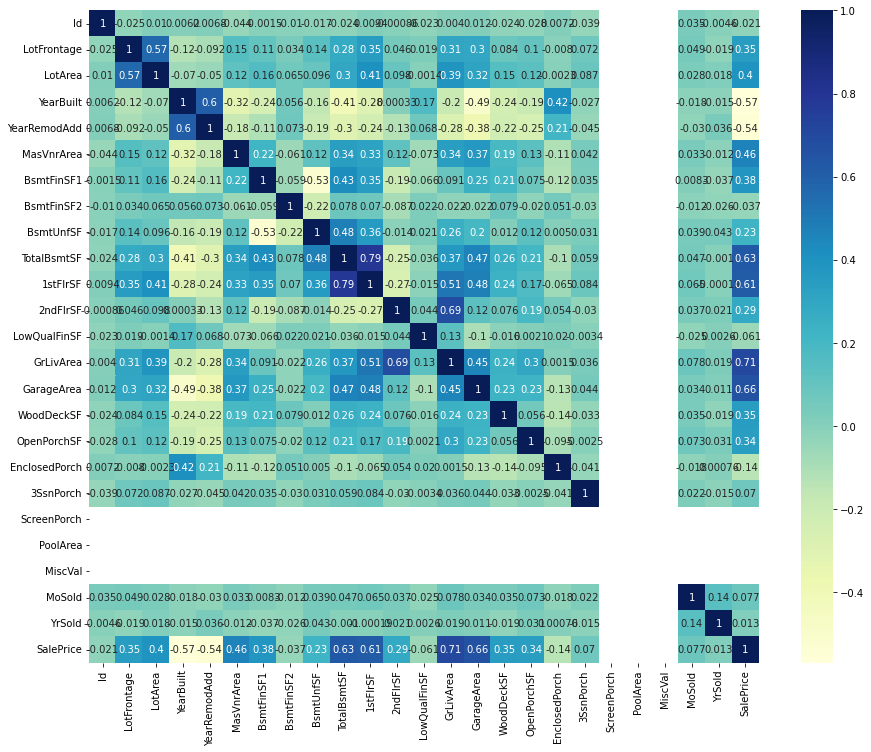

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [47]:
data.ScreenPorch.describe()

count    1253.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ScreenPorch, dtype: float64

In [48]:
data.PoolArea.describe()

count    1253.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [49]:
data.MiscVal.describe()

count    1253.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: MiscVal, dtype: float64

In [50]:
# As 'ScreenPorch','PoolArea','MiscVal' contains only zero values , it does not convey any information, hence better to drop it
data=data.drop(['ScreenPorch','PoolArea','MiscVal'],axis=1)

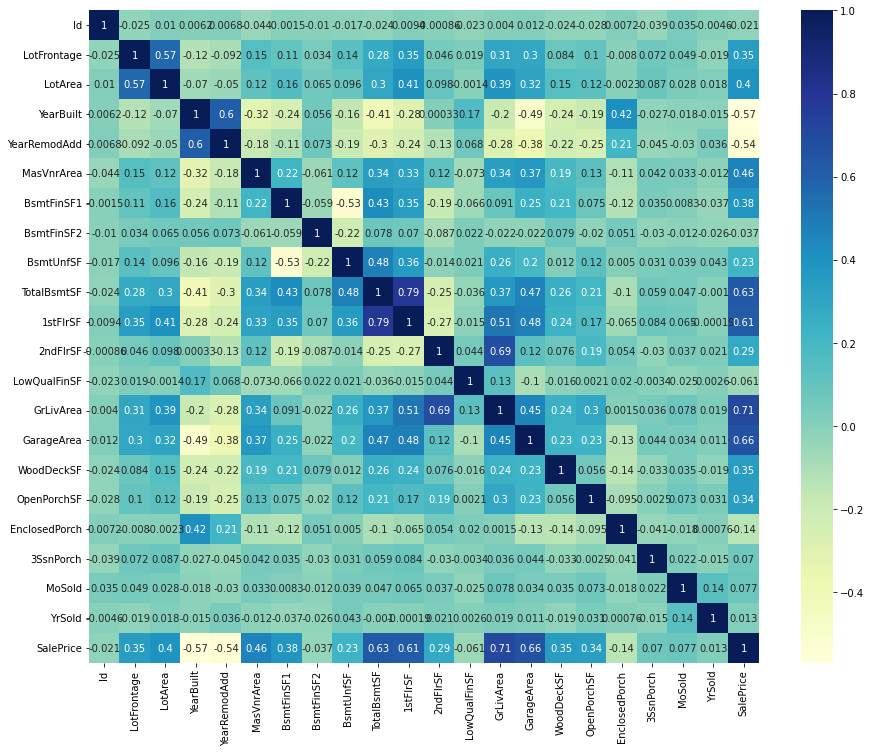

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [52]:
data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [56]:
target_var_log=np.log(data['SalePrice'])

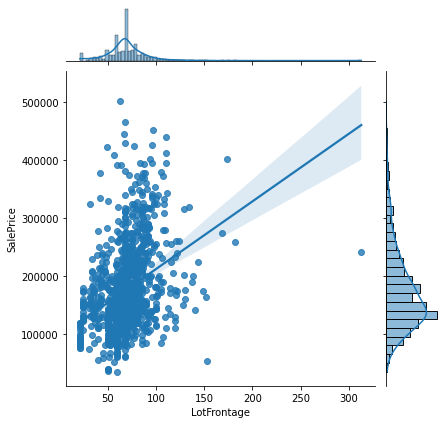

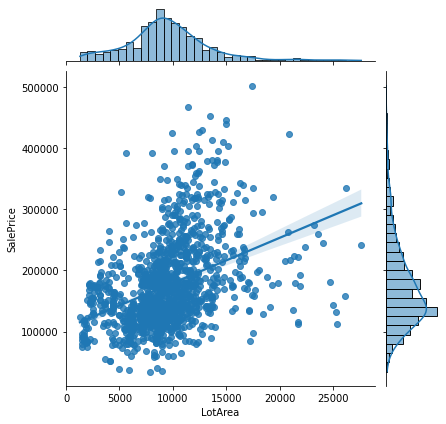

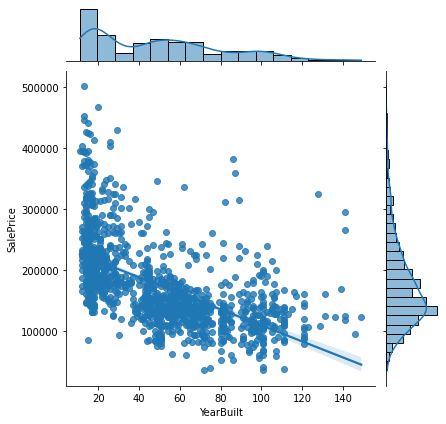

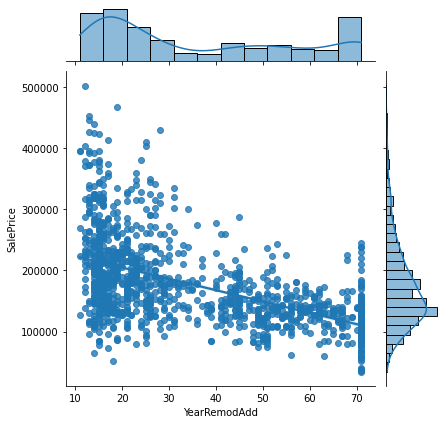

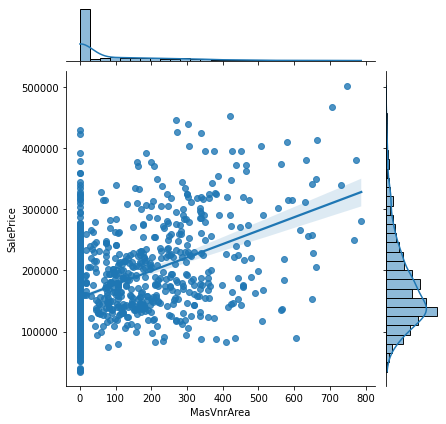

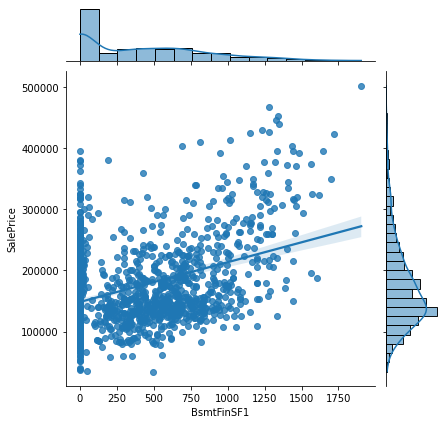

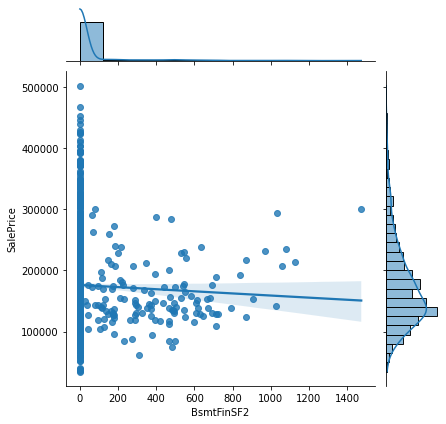

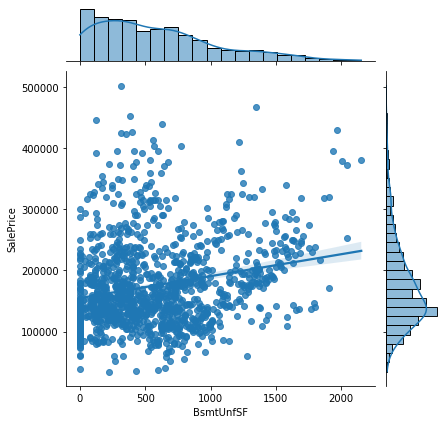

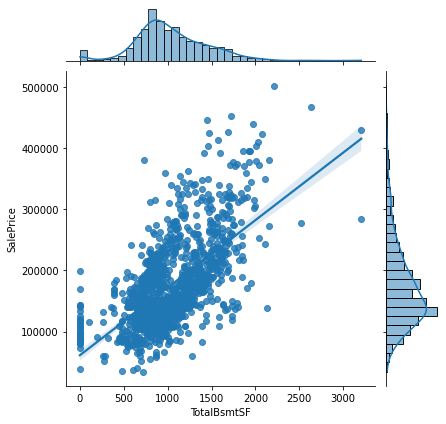

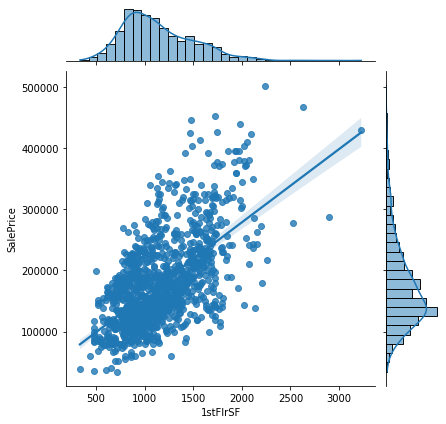

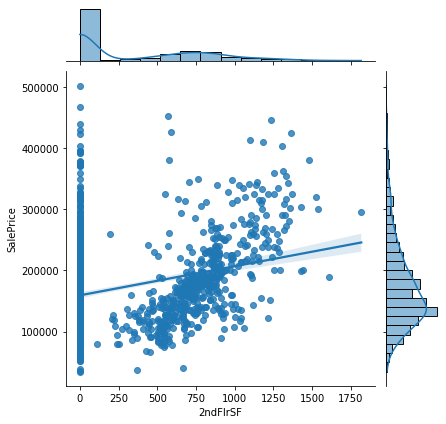

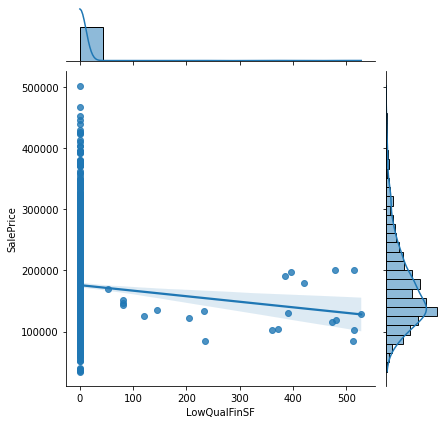

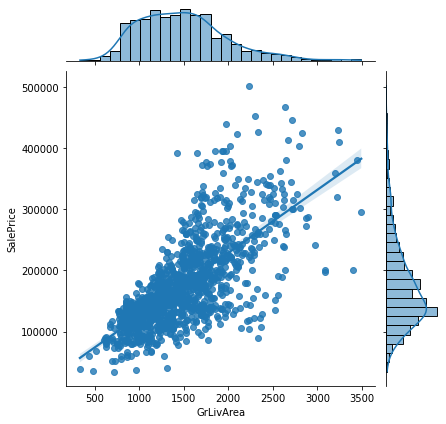

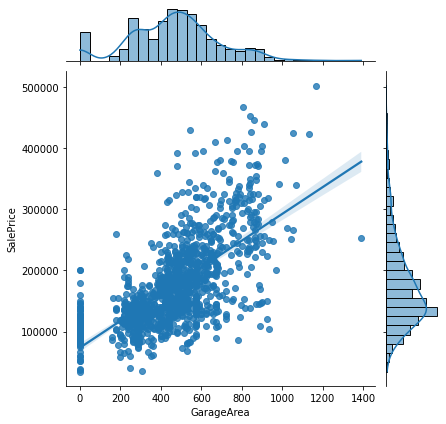

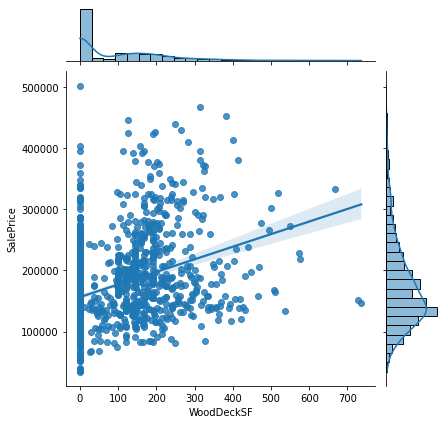

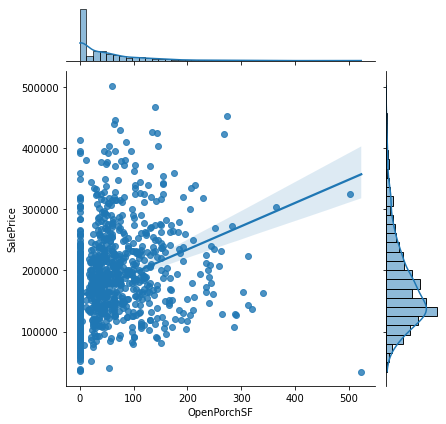

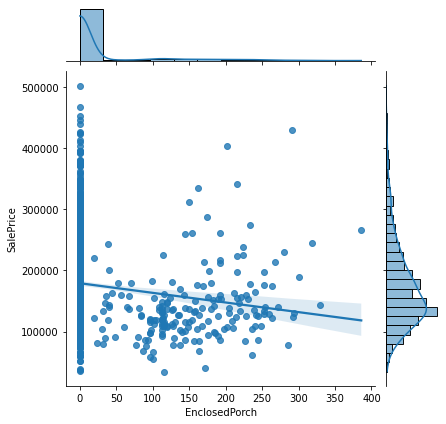

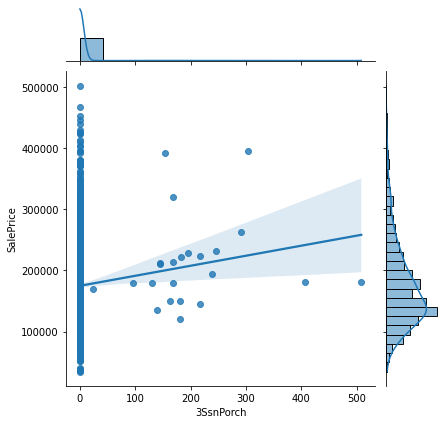

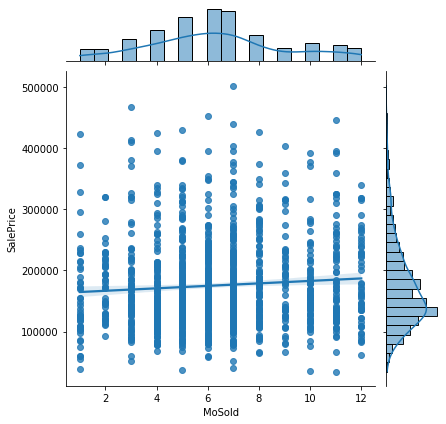

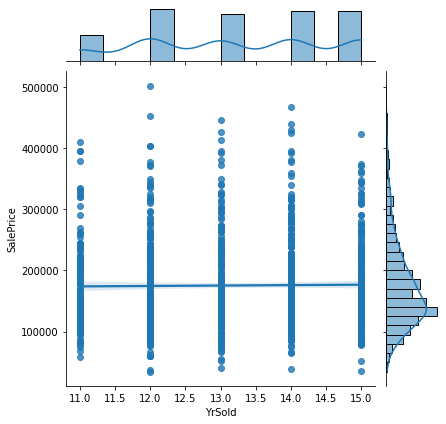

In [57]:
# Joint plot of all Independent continuous variables with Target variable
variable_plot=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MoSold','YrSold']
for plot in variable_plot:
  sns.jointplot(x=plot,y='SalePrice',data=data,kind='reg')


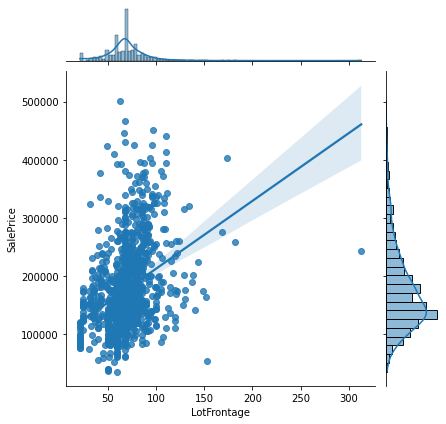

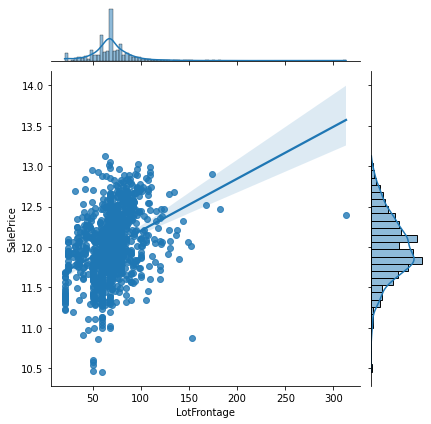

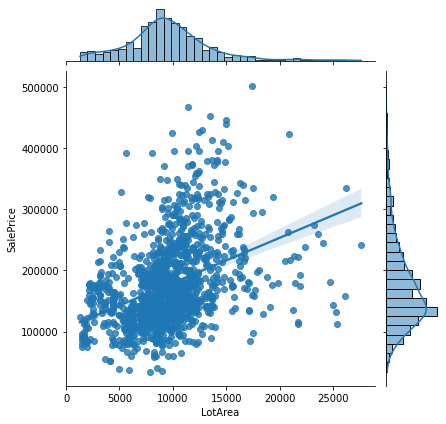

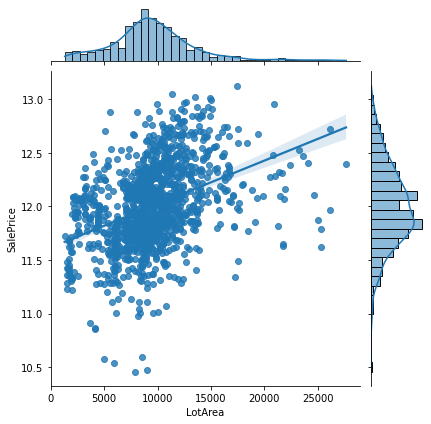

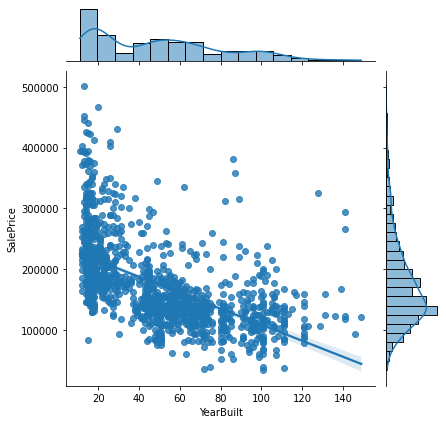

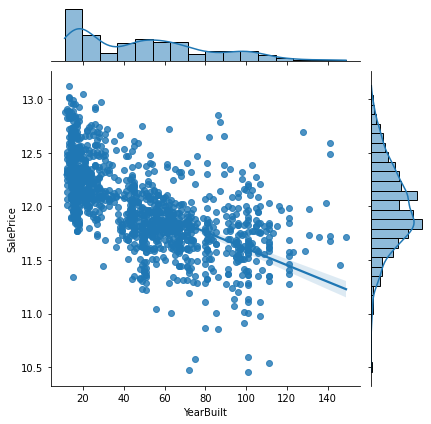

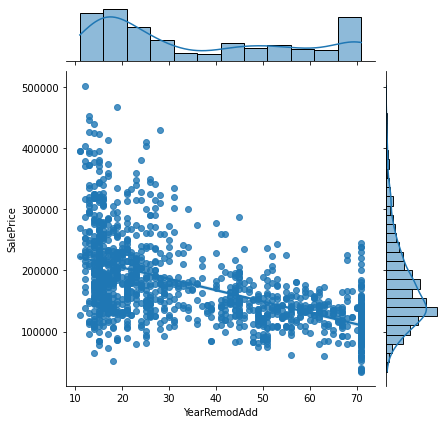

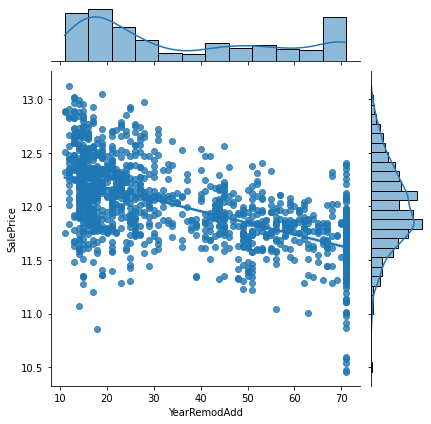

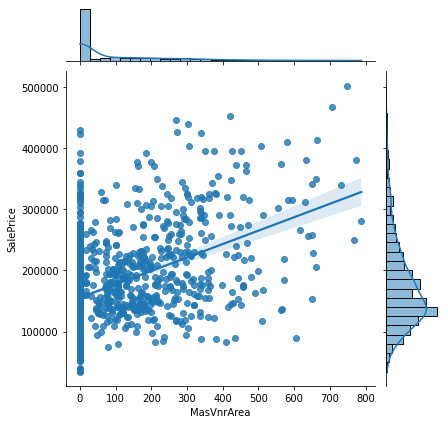

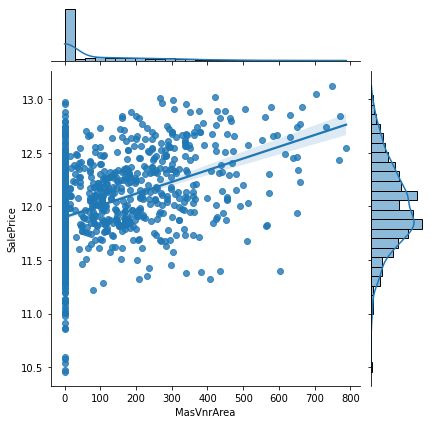

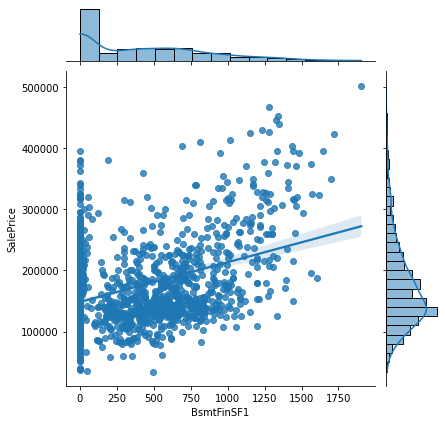

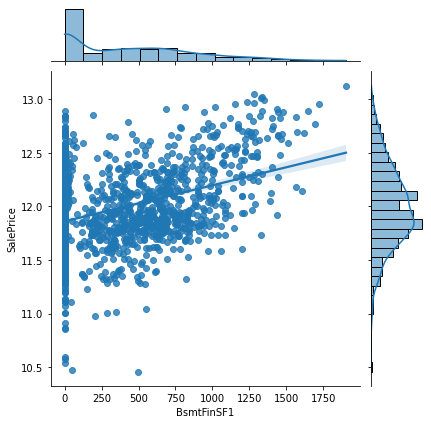

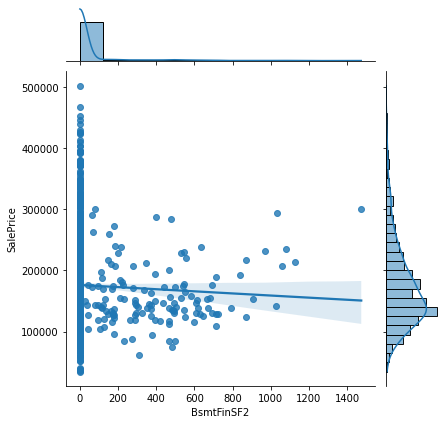

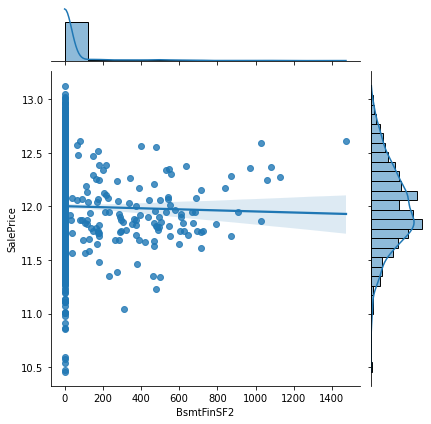

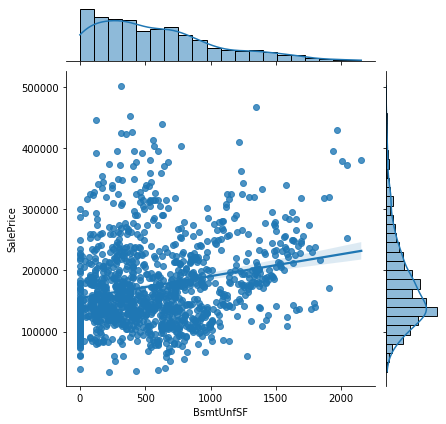

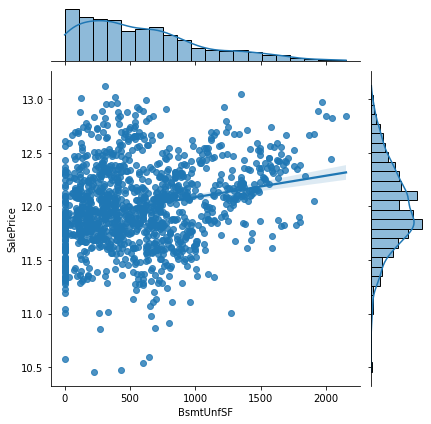

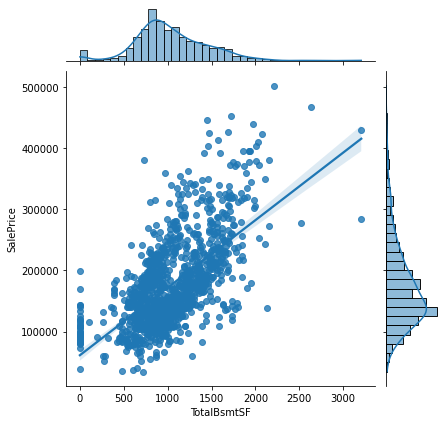

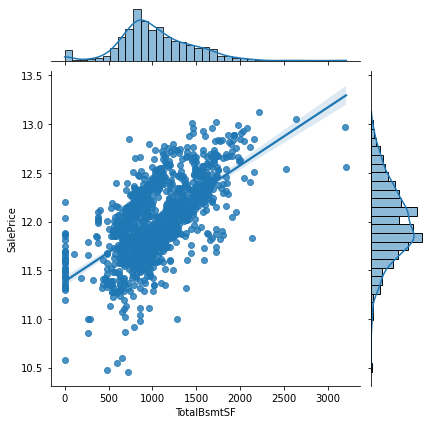

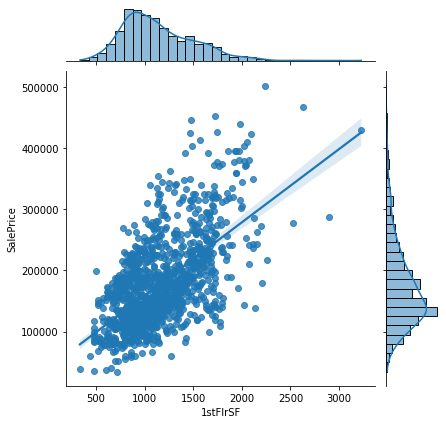

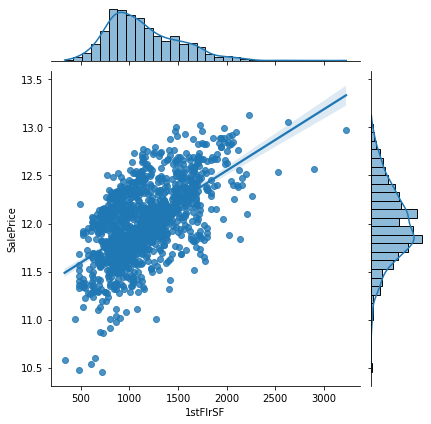

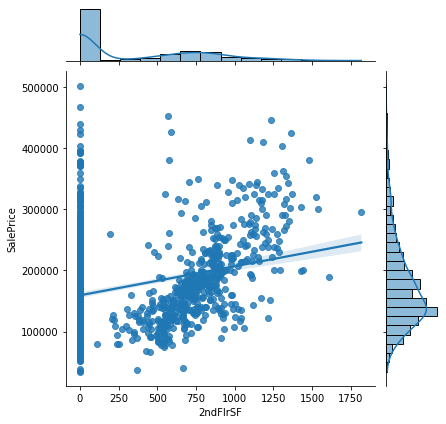

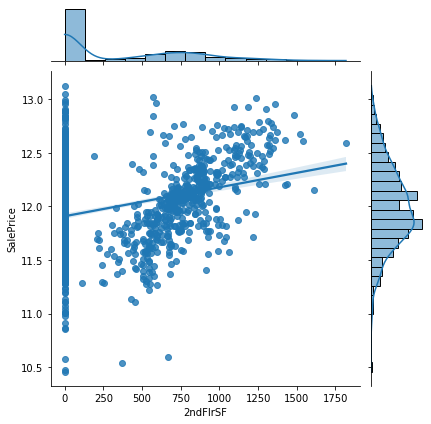

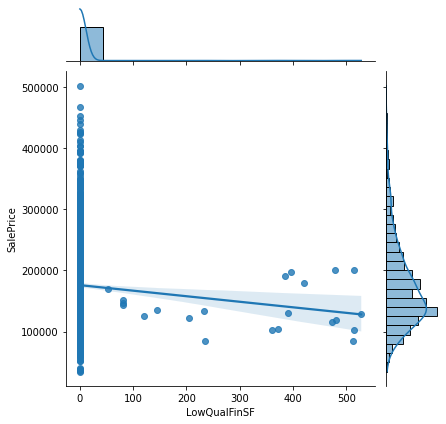

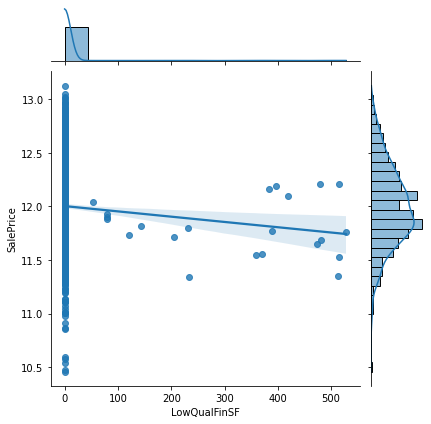

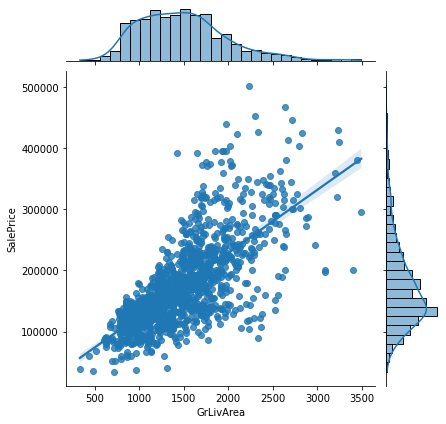

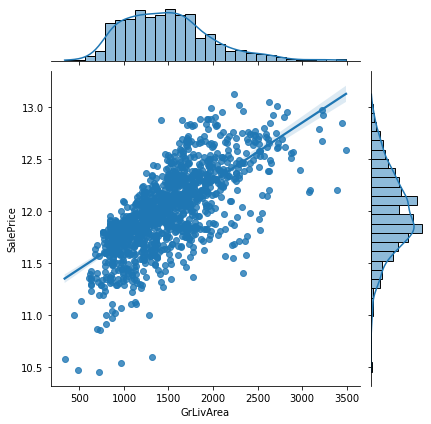

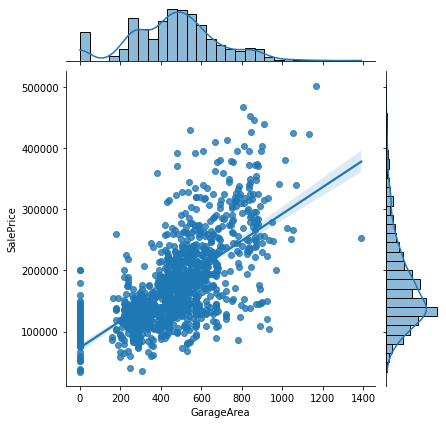

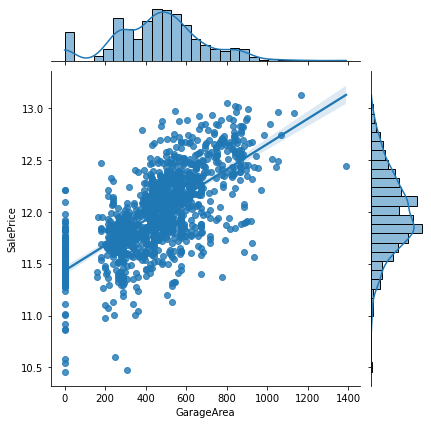

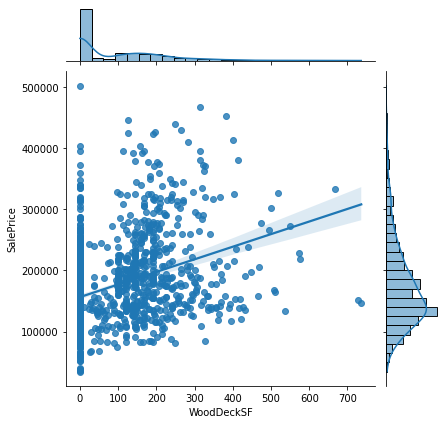

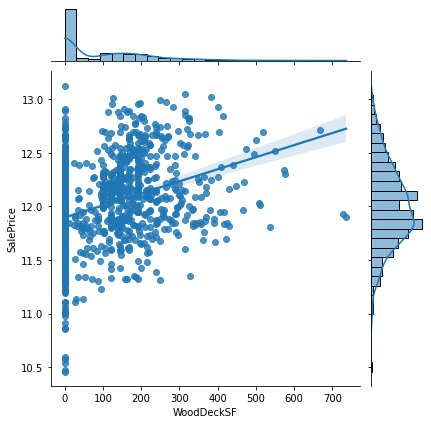

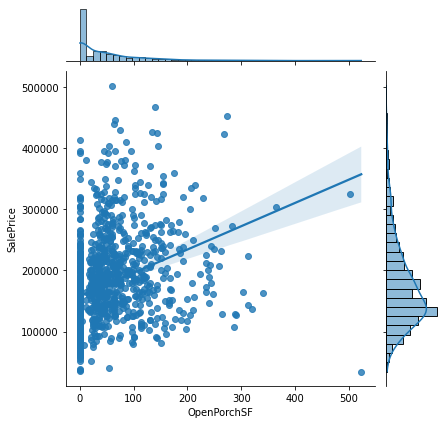

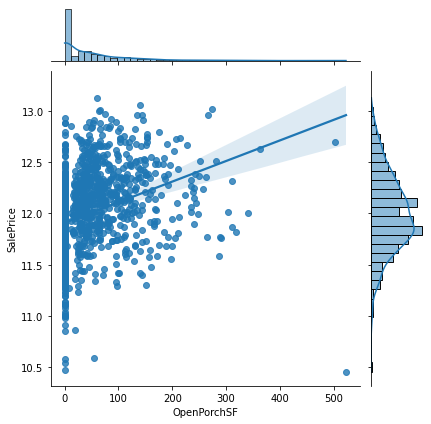

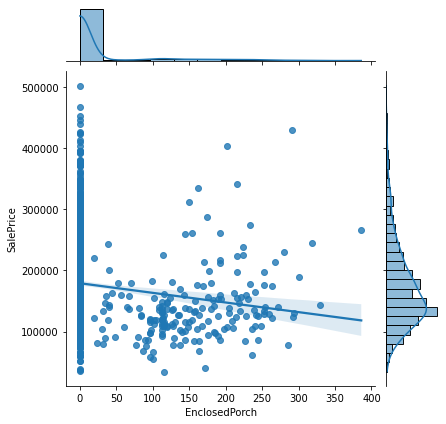

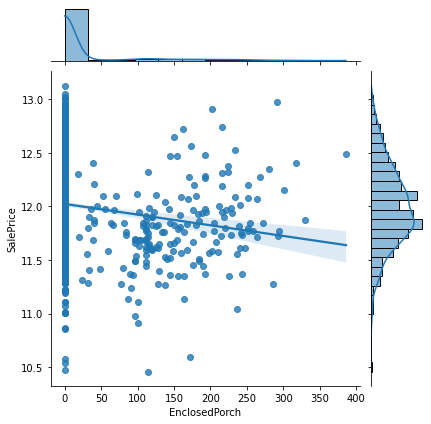

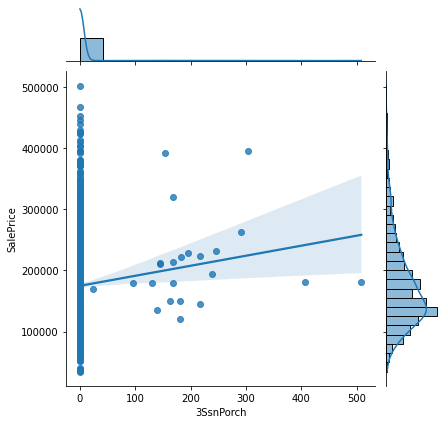

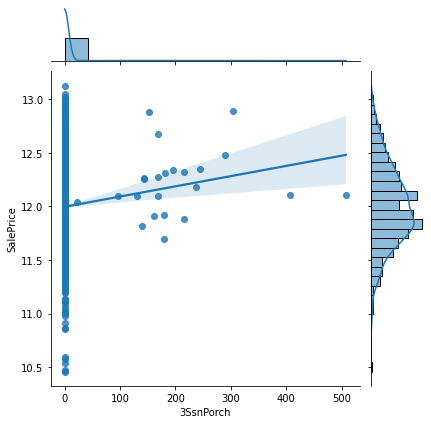

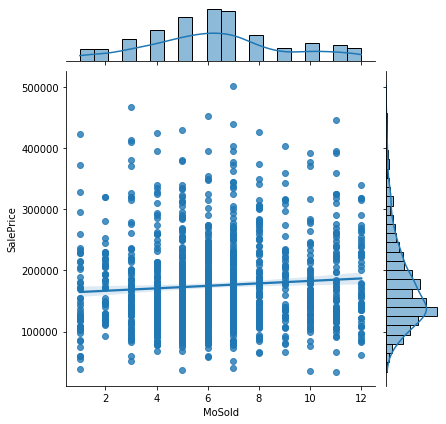

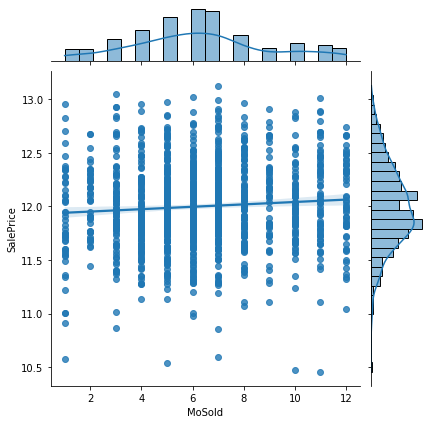

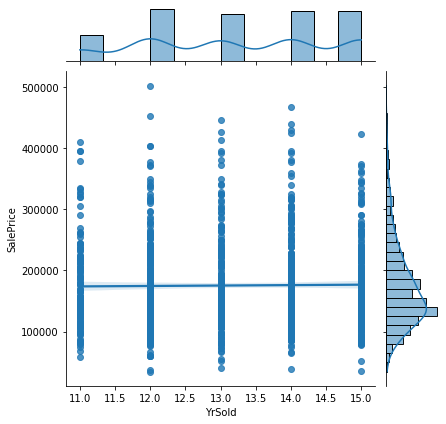

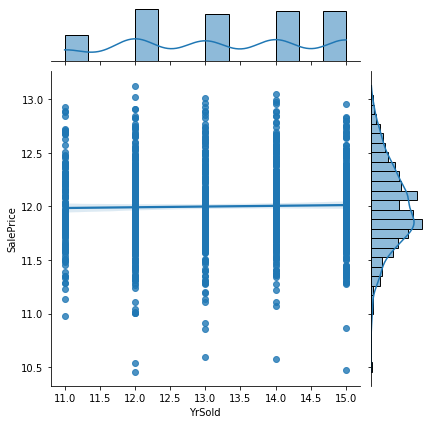

In [58]:
# Combining above plots for better comparison
variable_plot=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MoSold','YrSold']
for plot in variable_plot:
  sns.jointplot(x=plot,y='SalePrice',data=data,kind='reg')
  sns.jointplot(x=plot,y=target_var_log,data=data,kind='reg')

In [59]:
# from above comparison it is evident that linearity improves if log of SalePrice is taken as target variable
# hence replace target variable by its log
data['SalePrice']=target_var_log

In [60]:
# Concatenating dummy variables to main data
data2=pd.concat([data,dummy], axis=1)
data2.shape

(1253, 302)

In [61]:
data2.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,18,18,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,2,13,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,45,45,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,5,14,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,20,19,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,9,13,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,106,51,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,2,15,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,21,21,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,12,13,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
data2 = data2.drop([ 'Id'], axis=1)

In [63]:
data2.shape

(1253, 301)

#Splitting data into train and split

In [64]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(data2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
train.shape

(877, 301)

In [66]:
test.shape

(376, 301)

# Rescaling the features using standard sclaer since from joint plot it is roughly evident that most of continuous variables are having normal distribution

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [68]:
train[variable_plot] = scaler.fit_transform(train[variable_plot])

In [69]:
train[variable_plot].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,YrSold
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,0.358445,0.335302,0.272570,0.414500,0.110147,0.219936,0.030613,0.269483,0.325664,0.281149,0.178709,0.008401,0.361815,0.337217,0.128469,0.091649,0.071611,0.006426,0.483777,0.548461
std,0.144720,0.154620,0.226182,0.345227,0.182879,0.223621,0.107553,0.210788,0.130581,0.127819,0.229187,0.079199,0.150052,0.152874,0.165665,0.125709,0.187879,0.060052,0.247317,0.333089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.295455,0.249170,0.051095,0.100000,0.000000,0.000000,0.000000,0.100325,0.247661,0.184865,0.000000,0.000000,0.246597,0.233094,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.356061,0.323808,0.248175,0.266667,0.000000,0.189076,0.000000,0.227589,0.305365,0.253628,0.000000,0.000000,0.350744,0.341007,0.000000,0.049801,0.000000,0.000000,0.454545,0.500000
75%,0.431818,0.410128,0.408759,0.716667,0.180203,0.370798,0.000000,0.385973,0.402682,0.357982,0.387239,0.000000,0.446344,0.414388,0.228261,0.135458,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
y_train=train.pop('SalePrice')
x_train=train

In [71]:
x_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,...,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,...,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,0.358445,0.335302,0.272570,0.414500,0.110147,0.219936,0.030613,0.269483,0.325664,0.281149,0.178709,0.008401,0.361815,0.337217,0.128469,0.091649,0.071611,0.006426,0.483777,0.548461,0.047891,0.002281,0.007982,0.096921,0.188141,0.043330,0.011403,0.030787,0.014823,0.043330,0.063854,0.044470,0.006842,0.017104,0.042189,0.012543,0.776511,0.165336,0.997719,0.931585,...,0.282782,0.057013,0.057013,0.290764,0.429875,0.265678,0.551881,0.123147,0.002281,0.035348,0.012543,0.057013,0.002281,0.891676,0.027366,0.005701,0.057013,0.004561,0.904219,0.020525,0.914481,0.035348,0.104903,0.004561,0.824401,0.001140,0.001140,0.002281,0.001140,0.004561,0.001140,0.004561,0.077537,0.002281,0.875713,0.003421,0.005701,0.012543,0.835804,0.077537
std,0.144720,0.154620,0.226182,0.345227,0.182879,0.223621,0.107553,0.210788,0.130581,0.127819,0.229187,0.079199,0.150052,0.152874,0.165665,0.125709,0.187879,0.060052,0.247317,0.333089,0.213656,0.047727,0.089034,0.296019,0.391048,0.203714,0.106233,0.172838,0.120914,0.203714,0.244632,0.206254,0.082477,0.129732,0.201135,0.111353,0.416821,0.371696,0.047727,0.252601,...,0.450608,0.231999,0.231999,0.454374,0.495340,0.441946,0.497585,0.328793,0.047727,0.184763,0.111353,0.231999,0.047727,0.310966,0.163241,0.075334,0.231999,0.067419,0.294459,0.141867,0.279812,0.184763,0.306603,0.067419,0.380695,0.033768,0.033768,0.047727,0.033768,0.067419,0.033768,0.067419,0.267594,0.047727,0.330097,0.058420,0.075334,0.111353,0.370665,0.267594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [72]:
y_train.describe()

count    877.000000
mean      11.999977
std        0.376977
min       10.471950
25%       11.763684
50%       11.979799
75%       12.252479
max       13.126031
Name: SalePrice, dtype: float64

# Linear Regression

In [73]:
#Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-22320821869.02301
[ 2.22997319e-03  2.18941662e-01 -4.10509127e-01 -4.94773353e-02
  1.35879639e-02  2.77791394e+10  2.15054892e+10  3.14120205e+10
 -4.67751685e+10 -4.00652494e+09 -2.51688401e+09 -7.30976215e+08
  4.37339747e+09  1.08949824e-01  8.89563033e-02  6.50238278e-02
  3.41735816e-02  1.23061421e-01 -8.31370914e-03  1.10970199e-02
 -1.70935820e-02 -4.02159825e+08  5.28801115e-01 -3.25441992e-02
 -8.95433534e-02  1.10172662e-02  1.06997367e-01 -1.27410202e-01
 -1.30584742e-01 -3.86054037e+09  3.39313797e-02 -1.02890381e-01
 -8.81845367e-02  4.47671890e-01  2.44797230e-01  1.25625610e-01
  1.66282654e-01  1.37483597e-01 -2.03847885e-02  7.71999359e-03
  3.64058018e-02 -9.17816162e-03 -7.87000656e-02  7.99083710e-03
 -1.12628937e-02 -7.41333961e-02 -6.39724731e-03  3.47318649e-02
 -5.78393936e-02 -8.87675285e-02 -1.33414268e-02  3.43332291e-02
  2.19666616e+07  2.57690241e+08  3.84668112e-02  7.57329464e-02
  4.04651165e-02  2.57892609e-02  1.65181160e-01 -3.15637589e-02
  2.51

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
test[variable_plot] = scaler.transform(test[variable_plot])

In [77]:
y_test=test.pop('SalePrice')
x_test=test

In [78]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9633142176627154
-1.5403502656546685e+18
4.566996080144792
9.816784031443495e+19
0.0052075211860259886
2.6108468168732698e+17


# Ridge Regression

In [135]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,30,40, 50,60, 70, 80, 90, 100,200,300,400, 500,600,700,800,1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [136]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [137]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
print(ridge.coef_)

[ 1.05912961e-02  1.78314310e-01 -1.90686163e-01 -6.37628528e-02
  2.21435240e-02  1.62487030e-01  8.53382082e-02  5.09313998e-02
  1.69937345e-01  2.35969705e-01  1.59061471e-01 -2.02268403e-03
  3.07376418e-01  1.25426775e-01  8.16157425e-02  8.61365361e-02
  2.68687486e-02  6.36051758e-02 -1.08746675e-03  4.47312728e-03
 -2.85041036e-02  1.22579137e-02  2.11408676e-02  4.64501795e-04
 -4.31755242e-02  2.77335048e-02  3.52064438e-02 -3.73251771e-02
 -2.22182233e-02 -1.90583515e-02  1.86369832e-02 -7.53853257e-02
 -2.13434921e-02 -1.06489318e-02  9.29586877e-02  3.01388430e-02
  4.73678392e-02  3.11316964e-02 -2.98445885e-02  2.36415690e-02
  4.75228035e-02 -1.08082575e-02 -5.67372092e-02  3.81279718e-03
  1.09317577e-02 -3.28806202e-02  1.12952923e-02  3.82316865e-02
 -4.81773162e-02 -4.49358932e-02 -9.14891156e-03 -1.11071846e-02
  1.55634137e-02  0.00000000e+00 -1.49037750e-02  5.54836268e-03
  4.37853105e-02  3.01762164e-03  1.03828335e-01 -5.99680908e-02
 -1.53057055e-02 -4.94560

In [138]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9550853514706278
0.8869776253532848
5.591403827478162
7.203012635286167
0.0063756029959842215
0.019156948498101508


# Lasso

In [139]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [140]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [141]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
lasso.coef_

array([ 0.00000000e+00,  2.08652644e-01, -3.66468736e-01, -5.29484976e-02,
        7.53926601e-03,  1.23303908e-01,  7.79750679e-02, -0.00000000e+00,
        2.21210887e-01,  0.00000000e+00,  4.82425460e-02, -1.95669606e-02,
        8.05116370e-01,  1.55219303e-01,  7.54267038e-02,  9.39777063e-02,
        3.03497039e-02,  8.00887438e-02, -4.23536918e-03,  3.97019858e-03,
       -1.08157159e-02,  0.00000000e+00,  2.01957984e-02,  1.81286034e-03,
       -5.57430323e-02,  2.15556799e-02,  0.00000000e+00, -3.36936399e-02,
       -9.67222320e-03, -2.78400559e-02,  0.00000000e+00, -1.12718888e-01,
       -2.51303368e-02, -0.00000000e+00,  8.85948268e-02,  0.00000000e+00,
        2.48197074e-02,  1.06882287e-02, -1.25317661e-02,  1.91382176e-02,
        3.93121547e-02, -1.15432801e-03, -6.65056452e-02,  6.53578536e-03,
        0.00000000e+00, -3.65660975e-02,  3.81414768e-03,  3.60128895e-02,
       -3.76520365e-02, -4.79606839e-02, -6.99751727e-03, -1.00220619e-02,
        0.00000000e+00,  

In [143]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9573012193836415
0.8837748985665346
5.315551455575281
7.407125153576822
0.006061062093016284
0.019699800940363887


In [144]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.633142e-01,0.955085,0.957301
1,R2 Score (Test),-1.540350e+18,0.886978,0.883775
2,RSS (Train),4.566996e+00,5.591404,5.315551
3,RSS (Test),9.816784e+19,7.203013,7.407125
4,MSE (Train),7.216316e-02,0.079847,0.077853
5,MSE (Test),5.109645e+08,0.138409,0.140356


## Lets observe the changes in the coefficients after regularization

In [145]:
betas = pd.DataFrame(index=train.columns)

In [146]:
betas.rows = train.columns

In [147]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [148]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
LotFrontage,2.229973e-03,0.010591,0.000000e+00
LotArea,2.189417e-01,0.178314,2.086526e-01
YearBuilt,-4.105091e-01,-0.190686,-3.664687e-01
YearRemodAdd,-4.947734e-02,-0.063763,-5.294850e-02
MasVnrArea,1.358796e-02,0.022144,7.539266e-03
BsmtFinSF1,2.777914e+10,0.162487,1.233039e-01
BsmtFinSF2,2.150549e+10,0.085338,7.797507e-02
BsmtUnfSF,3.141202e+10,0.050931,-0.000000e+00
TotalBsmtSF,-4.677517e+10,0.169937,2.212109e-01
1stFlrSF,-4.006525e+09,0.235970,0.000000e+00


In [149]:
betas['abs_lasso']=betas['Lasso'].apply(lambda x:np.abs(x))
betas['abs_ridge']=betas['Ridge'].apply(lambda x:np.abs(x))
betas.head()

,Linear,Ridge,Lasso,abs_lasso,abs_ridge
LotFrontage,0.002230,0.010591,0.000000,0.000000,0.010591
LotArea,0.218942,0.178314,0.208653,0.208653,0.178314
YearBuilt,-0.410509,-0.190686,-0.366469,0.366469,0.190686
YearRemodAdd,-0.049477,-0.063763,-0.052948,0.052948,0.063763
MasVnrArea,0.013588,0.022144,0.007539,0.007539,0.022144


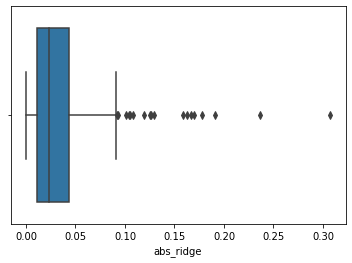

In [150]:
# Plotting box plot of co-efficients using ridge
sns.boxplot(betas['abs_ridge'])

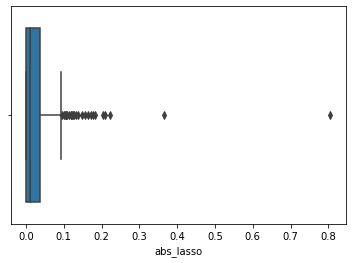

In [151]:
# Plotting box plot of co-efficients using lasso
sns.boxplot(betas['abs_lasso'])

In [165]:
# finding 10 most important predictor variables
betas[(betas['abs_lasso']>0.15)]['abs_lasso'].sort_values(ascending=False)

GrLivArea          0.805116
YearBuilt          0.366469
TotalBsmtSF        0.221211
LotArea            0.208653
OverallCond_3      0.203675
Foundation_Wood    0.181525
OverallQual_2      0.177038
OverallQual_10     0.172163
OverallQual_9      0.163155
GarageArea         0.155219
Name: abs_lasso, dtype: float64

Text(0.5, 0, 'Errors')

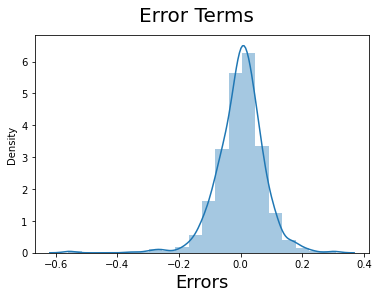

In [161]:
  # Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Text(0, 0.5, 'y_pred')

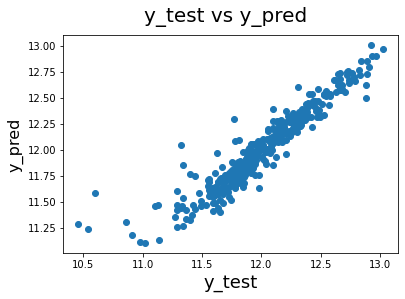

In [163]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      